# Machine learning
## Chapter 6, 3 Class Classification

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
%matplotlib inline

## 3 Class classification
* input : 2D data $x_n$
* output : 3-class classification, label $t_n \in \{ 0, 1 \}$

$$
\mathbf{X} = \begin{bmatrix}
x^{(1)}_0 && x^{(1)}_1 \\
x^{(2)}_0 && x^{(2)}_1 \\
... \\
x^{(N)}_0 && x^{(N)}_1
\end{bmatrix}
\mathbf{T} = \begin{bmatrix}
t^{(1)} \\ t^{(2)} \\ ... \\ t^{(2)}
\end{bmatrix}
$$

Since we use bias term $w_2$
$$a = w_0x_0 + w_1x_1 + w_2$$
we can just add bias term to form a linear equation
$$
\mathbf{X} = \begin{bmatrix}
x^{(1)}_0 && x^{(1)}_1 && 1\\
x^{(2)}_0 && x^{(2)}_1 && 1\\
... \\
x^{(N)}_0 && x^{(N)}_1 && 1
\end{bmatrix}
$$

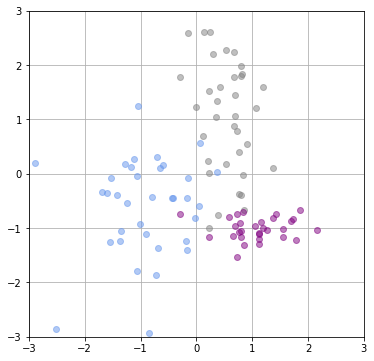

In [2]:
N = 100
K = 3

mu = np.array([
    [-0.8, -0.5],
    [0.5, 1.0],
    [1.0, -1.0]
])

sig = np.array([
    [0.7, 0.7],
    [0.4, 0.8],
    [0.5, 0.2]
])

T_label = np.array(np.random.choice(3, N))
X = np.multiply(np.random.randn(N, 2), sig[T_label]) + mu[T_label]
X = np.concatenate((X, np.ones((N, 1))), 1)

plt.figure(figsize=(6, 6))
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.plot(X[T_label==0, 0], X[T_label==0, 1], 'cornflowerblue', alpha=0.5, marker='o', linestyle='none')
plt.plot(X[T_label==1, 0], X[T_label==1, 1], 'gray', alpha=0.5, marker='o', linestyle='none')
plt.plot(X[T_label==2, 0], X[T_label==2, 1], 'purple', alpha=0.5, marker='o', linestyle='none')

plt.grid(True)
plt.show()

## Weights

since we add 1 to $\mathbf{X}$, we can express weights as matrix form
$$
\mathbf{W} =
\begin{bmatrix}
w_{00} && w_{01} && w_{02}  \\
w_{10} && w_{11} && w_{12}  \\ 
w_{20} && w_{21} && w_{12}
\end{bmatrix}
$$
$$ 
\mathbf{W}
\begin{bmatrix}
x_0 \\ x_1 \\ x_2
\end{bmatrix}
=
\begin{bmatrix}
a_0 \\ a_1 \\ a_2
\end{bmatrix}
$$

where $a_j$ is plausability of label $j$

for probabilistic expression, use **softmax**
$$y_j = \frac{\exp{(a_j)}}{\sum_{k=0}^{2}{\exp{(a_k)}}}$$

In [3]:
def softmax(x0, x1, w):
  w = w.reshape((3,3))
  n = len(x1)
  y = np.zeros((n,K))
  for k in range(3):
    y[:, k] = np.exp( w[k, 0] * x0 + w[k, 1] * x1 + w[k, 2] )
  wk = np.sum(y, axis=1)
  wk = y.T / wk
  y = wk.T
  return y

## 1-of-K encoding(one-hot encoding)
$$t=0 \hspace{5mm} [1 \hspace{2mm} 0 \hspace{2mm} 0]$$
$$t=1 \hspace{5mm} [0 \hspace{2mm} 1 \hspace{2mm} 0]$$
$$t=2 \hspace{5mm} [0 \hspace{2mm} 0 \hspace{2mm} 1]$$

In [4]:
T = np.eye(K)[T_label]

## Cross-entropy

Likelihood can be expressed as 
$$P(\mathbf{T} | \mathbf{X}) = y_0^{t_0} y_1^{t_1} y_2^{t_2}$$

since 
$$P(\mathbf{T}=[0 \hspace{2mm} 1 \hspace{2mm} 0] | \mathbf{X}) = y_0^{1} y_1^{0} y_2^{0}$$
$$P(\mathbf{T}=[0 \hspace{2mm} 1 \hspace{2mm} 0] | \mathbf{X}) = y_0^{0} y_1^{1} y_2^{0}$$
$$P(\mathbf{T}=[0 \hspace{2mm} 0 \hspace{2mm} 1] | \mathbf{X}) = y_0^{0} y_1^{0} y_2^{1}$$

### Loglikelihood and cross-entropy error
$$E(\mathbf{W}) = -\frac{1}{N}\log{P(\mathbf{T}|\mathbf{X})}
= -\frac{1}{N}\sum_{n=0}^{N-1}{\sum_{k=0}^{2}}{t_{nk}\log{y_{nk}}}
$$

### partial difference of cross-entropy loss

$$\frac{\partial E}{\partial w_{ki}}=\frac{1}{N}\sum_{n=0}^{N-1}{(y_{nk}-t_{nk})x_i}$$

In [35]:
def cross_entropy(w, x, t):
    X_n = x.shape[0]
    y = softmax(x[:, 0], x[:, 1], w)
    return (-1.0 / N) * np.sum(np.multiply(t, np.log(y)))


def dev_cross_entropy(w, x, t):
    X_n = x.shape[0]
    y=softmax(x[:, 0], x[:, 1], w)
    dcee = np.zeros((3, 3))
    for n in range(N):
        for k in range(K):
            dcee[k, :] = dcee[k, :] - (t[n, k]-y[n, k]) * x[n, :]
    dcee = dcee / X_n
    return dcee.reshape(-1)

w_init = np.zeros((3, 3))
W = minimize(cross_entropy, w_init, args=(X, T), jac=dev_cross_entropy, method="CG").x.reshape((3, 3))
print(W)

[[-5.15483983  0.61363875  1.95170069]
 [ 1.46237912  2.65944066  1.53437916]
 [ 3.69246071 -3.27307941 -3.48607985]]


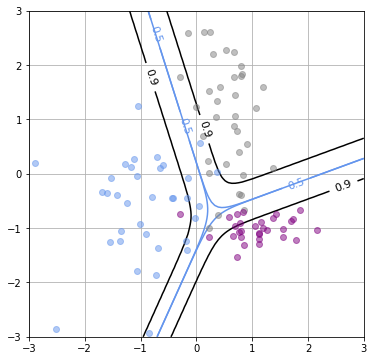

In [38]:
_x = np.linspace(-3, 3, 100)
_y = np.linspace(-3, 3, 100)

xx, yy = np.meshgrid(_x, _y)

z = np.zeros((100, 100, 3))

plt.figure(figsize=(6, 6))
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.plot(X[T_label==0, 0], X[T_label==0, 1], 'cornflowerblue', alpha=0.5, marker='o', linestyle='none')
plt.plot(X[T_label==1, 0], X[T_label==1, 1], 'gray', alpha=0.5, marker='o', linestyle='none')
plt.plot(X[T_label==2, 0], X[T_label==2, 1], 'purple', alpha=0.5, marker='o', linestyle='none')

for i in range(100):
    wk = softmax(xx[0:, i], yy[:, i], W)
    for j in range(3):
        z[:, i, j] = wk[:, j]
for j in range(3):
    cont = plt.contour(xx, yy, z[:, :, j], levels=(0.5, 0.9), colors=['cornflowerblue', 'k'])
    cont.clabel(fmt='%1.1f', fontsize=11)

plt.grid(True)
plt.show()